In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
titanic_data = pd.read_csv('data/train.csv')

In [57]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


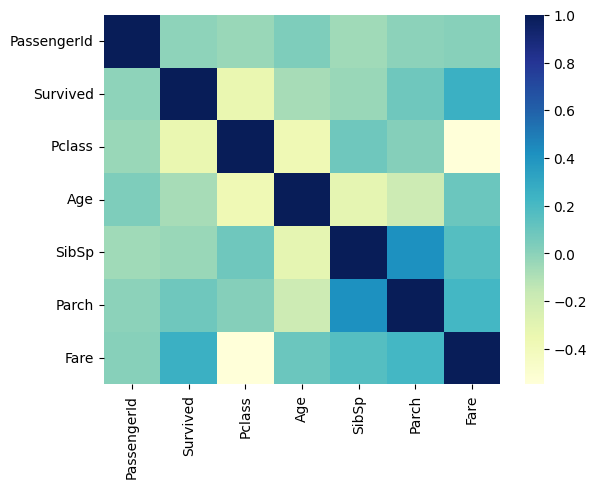

In [58]:
import seaborn as sns

titanic_data_numeric = titanic_data.select_dtypes(include=[np.number])

sns.heatmap(titanic_data_numeric.corr(), cmap="YlGnBu")

plt.show()

In [59]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanic_data,titanic_data[["Survived", "Pclass","Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

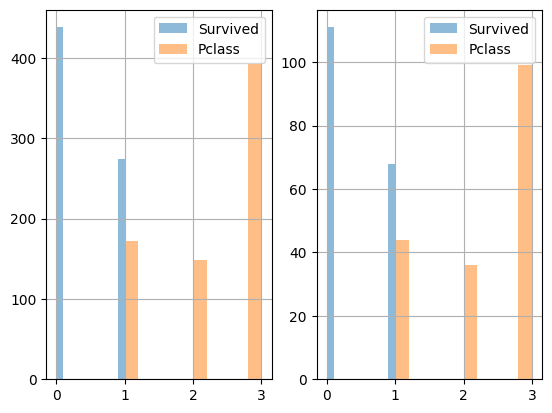

In [60]:
plt.subplot(1, 2, 1)
strat_train_set['Survived'].hist(alpha=0.5, label='Survived')
strat_train_set['Pclass'].hist(alpha=0.5, label='Pclass')
plt.legend()

plt.subplot(1, 2, 2)
strat_test_set['Survived'].hist(alpha=0.5, label='Survived')
strat_test_set['Pclass'].hist(alpha=0.5, label='Pclass')
plt.legend()

plt.show()


In [61]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 399 to 622
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          564 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        162 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [62]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [63]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()

        column_names = ["C", "S", "Q", "N"]

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        matrix = encoder.fit_transform(X[['Sex']]).toarray()

        column_names = ["Female", "Male"]

        for i in range (len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        return X

In [64]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X,y=None):
        return self
    
    def transform(self, X):
        return  X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors = "ignore")

In [65]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([("ageimputer", AgeImputer()),
                      ("featureencoder", FeatureEncoder()),
                       ("featuredropper", FeatureDropper())])

In [66]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [67]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
399,400,1,2,28.00000,0,0,12.6500,0.0,0.0,1.0,1.0,0.0
311,312,1,1,18.00000,2,2,262.3750,1.0,0.0,0.0,1.0,0.0
637,638,0,2,31.00000,1,1,26.2500,0.0,0.0,1.0,0.0,1.0
356,357,1,1,22.00000,0,1,55.0000,0.0,0.0,1.0,1.0,0.0
853,854,1,1,16.00000,0,1,39.4000,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
370,371,1,1,25.00000,1,0,55.4417,1.0,0.0,0.0,0.0,1.0
260,261,0,3,29.72695,0,0,7.7500,0.0,1.0,0.0,0.0,1.0
455,456,1,3,29.00000,0,0,7.8958,1.0,0.0,0.0,0.0,1.0
235,236,0,3,29.72695,0,0,7.5500,0.0,0.0,1.0,1.0,0.0


In [68]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 399 to 622
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [69]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
Y_data = y.to_numpy()


In [70]:
X_data

array([[-0.1629329 , -0.37019624, -0.13487832, ...,  0.61848547,
         1.35941164, -1.35941164],
       [-0.50578365, -1.56828591, -0.91589855, ..., -1.61685287,
         1.35941164, -1.35941164],
       [ 0.76432254, -0.37019624,  0.09942775, ...,  0.61848547,
        -0.73561236,  0.73561236],
       ...,
       [ 0.05524485,  0.82789342, -0.05677629, ..., -1.61685287,
        -0.73561236,  0.73561236],
       [-0.80188203,  0.82789342,  0.        , ...,  0.61848547,
         1.35941164, -1.35941164],
       [ 0.70588207,  0.82789342, -0.75969451, ..., -1.61685287,
        -0.73561236,  0.73561236]])

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10, 100, 200, 500],
     "max_depth": [None, 5, 10],
     "min_samples_split" : [2, 3, 4]
     }
]

grid_search = GridSearchCV(clf, param_grid, cv = 3, scoring = "accuracy", return_train_score = True)

grid_search.fit(X_data, Y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [72]:
final_clf = grid_search.best_estimator_


In [73]:
final_clf

RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=200)

In [74]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [75]:
X_test = strat_test_set.drop(['Survived'], axis=1)
Y_test = strat_test_set['Survived']

scaler = StandardScaler()

X_data_test = scaler.fit_transform(X_test)
Y_data_test = Y_test.to_numpy()

In [76]:
final_clf.score(X_data_test, Y_data_test)

0.8156424581005587

In [78]:
final_data = pipeline.fit_transform(titanic_data)

In [85]:
X_final = final_data.drop(["Survived"], axis=1)
Y_final = final_data["Survived"]

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
Y_data_final = Y_final.to_numpy()

In [86]:
prod_clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10, 100, 200, 500],
     "max_depth": [None, 5, 10],
     "min_samples_split" : [2, 3, 4]
     }
]

grid_search = GridSearchCV(prod_clf, param_grid, cv = 3, scoring = "accuracy", return_train_score = True)

grid_search.fit(X_data_final, Y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [90]:
prod_final_clf = grid_search.best_estimator_

In [91]:
prod_final_clf

RandomForestClassifier(max_depth=5, n_estimators=500)